In [ ]:
!pip install ktrain 

     |████████████████████████████████| 25.3 MB 86 kB/s 
     |████████████████████████████████| 6.8 MB 25.2 MB/s 
     |████████████████████████████████| 981 kB 34.3 MB/s 
     |████████████████████████████████| 263 kB 49.9 MB/s 
     |████████████████████████████████| 2.8 MB 33.0 MB/s 
     |████████████████████████████████| 1.2 MB 37.0 MB/s 
     |████████████████████████████████| 468 kB 48.3 MB/s 
     |████████████████████████████████| 59 kB 6.2 MB/s 
     |████████████████████████████████| 596 kB 35.0 MB/s 
     |████████████████████████████████| 3.3 MB 45.1 MB/s 
     |████████████████████████████████| 895 kB 45.4 MB/s 
  Created wheel for ktrain: filename=ktrain-0.28.3-py3-none-any.whl size=25292659 sha256=16f1e77a2ac2ac3858140f42b000e17b719098cd30f9f16c69aabd02ecd58cd0
  Stored in directory: /root/.cache/pip/wheels/6a/7e/c3/f46cdfc2b81c54424923b1405d7e670c35cacc11ada9a47b1c
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=cd38db344d7ed6dbc

In [ ]:
import ktrain
from ktrain import text 
from keras.preprocessing import sequence 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
import re
import unicodedata
import tensorflow as tf
import tensorflow.keras as keras
%matplotlib inline 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
from sklearn.model_selection import train_test_split 
import timeit 

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

# Data Preperation - GYAFC Corpus E&M 

In [ ]:
def extract(genre):
  k = []
  for l in open('/content/drive/MyDrive/GYAFC_Corpus/' + genre):
    k.append(l)
  return pd.DataFrame(k, columns=['sentence'])

In [ ]:
fr_train = extract('Entertainment_Music/train/formal')
fr_train = pd.concat([fr_train,pd.Series(np.ones(fr_train.shape[0]),name='formality_score')],axis=1)

In [ ]:
fr_train_informal = extract('Entertainment_Music/train/informal')
fr_train_informal = pd.concat([fr_train_informal,pd.Series(np.zeros(fr_train_informal.shape[0]),name='formality_score')],axis=1)

In [ ]:
fr_train = pd.concat([fr_train, fr_train_informal], ignore_index=True)

In [ ]:
fr_train = fr_train.sample(frac=1).reset_index(drop=True)

In [ ]:
fr_tune = extract('Entertainment_Music/tune/formal')
fr_tune = pd.concat([fr_tune,pd.Series(np.ones(fr_tune.shape[0]),name='formality_score')],axis=1)

In [ ]:
fr_tune_informal = extract('Entertainment_Music/tune/informal')
fr_tune_informal = pd.concat([fr_tune_informal, pd.Series(np.zeros(fr_tune_informal.shape[0]),name='formality_score')],axis=1)

In [ ]:
fr_tune = pd.concat([fr_tune,fr_tune_informal], ignore_index=True)

In [ ]:
fr_tune = fr_tune.sample(frac=1).reset_index(drop=True)

In [ ]:
fr_test = extract('Entertainment_Music/test/formal')
fr_test = pd.concat([fr_test,pd.Series(np.ones(fr_test.shape[0]),name='formality_score')],axis=1)

In [ ]:
fr_test_informal = extract('Entertainment_Music/test/informal')
fr_test_informal = pd.concat([fr_test_informal, pd.Series(np.zeros(fr_test_informal.shape[0]),name='formality_score')],axis=1)

In [ ]:
fr_test = pd.concat([fr_test,fr_test_informal], ignore_index=True)

In [ ]:
fr_test = fr_test.sample(frac=1).reset_index(drop=True)

In [ ]:
print(fr_train.formality_score.value_counts())
print(fr_tune.formality_score.value_counts())
print(fr_test.formality_score.value_counts())

0.0    52595
1.0    52595
Name: formality_score, dtype: int64
0.0    2877
1.0    2356
Name: formality_score, dtype: int64
0.0    1416
1.0    1082
Name: formality_score, dtype: int64


In [ ]:
fr_train.sentence.str.len().describe()

count    105190.000000
mean         53.478772
std          24.736733
min           9.000000
25%          37.000000
50%          49.000000
75%          66.000000
max        4000.000000
Name: sentence, dtype: float64

In [ ]:
fr_tune.sentence.str.len().describe()

count    5233.000000
mean       54.562010
std        21.492132
min        13.000000
25%        39.000000
50%        50.000000
75%        67.000000
max       187.000000
Name: sentence, dtype: float64

In [ ]:
fr_test.sentence.str.len().describe()

count    2498.000000
mean       54.556845
std        21.187290
min        15.000000
25%        38.000000
50%        50.000000
75%        67.000000
max       195.000000
Name: sentence, dtype: float64

In [ ]:
#fr_train, _ = train_test_split(fr_train, train_size=0.5)

In [ ]:
fr_train.sentence.str.len().describe()

count    105190.000000
mean         53.478772
std          24.736733
min           9.000000
25%          37.000000
50%          49.000000
75%          66.000000
max        4000.000000
Name: sentence, dtype: float64

In [ ]:
fr_train[fr_train.sentence.str.len()>128].shape 

(478, 2)

In [ ]:
em_train = fr_train
em_tune = fr_tune
em_test = fr_test

In [ ]:
em_train.formality_score.value_counts()

0.0    52595
1.0    52595
Name: formality_score, dtype: int64






# Data Preperation - GYAFC Corpus F&R

In [ ]:
def extract(genre):
  k = []
  for l in open('/content/drive/MyDrive/GYAFC_Corpus/' + genre):
    k.append(l)
  return pd.DataFrame(k, columns=['sentence'])

In [ ]:
fr_train = extract('Family_Relationships/train/formal')
fr_train = pd.concat([fr_train,pd.Series(np.ones(fr_train.shape[0]),name='formality_score')],axis=1)

In [ ]:
fr_train_informal = extract('Family_Relationships/train/informal')
fr_train_informal = pd.concat([fr_train_informal,pd.Series(np.zeros(fr_train_informal.shape[0]),name='formality_score')],axis=1)

In [ ]:
fr_train = pd.concat([fr_train, fr_train_informal], ignore_index=True)

In [ ]:
fr_train = fr_train.sample(frac=1).reset_index(drop=True)

In [ ]:
fr_tune = extract('Family_Relationships/tune/formal')
fr_tune = pd.concat([fr_tune,pd.Series(np.ones(fr_tune.shape[0]),name='formality_score')],axis=1)

In [ ]:
fr_tune_informal = extract('Family_Relationships/tune/informal')
fr_tune_informal = pd.concat([fr_tune_informal, pd.Series(np.zeros(fr_tune_informal.shape[0]),name='formality_score')],axis=1)

In [ ]:
fr_tune = pd.concat([fr_tune,fr_tune_informal], ignore_index=True)

In [ ]:
fr_tune = fr_tune.sample(frac=1).reset_index(drop=True)

In [ ]:
fr_test = extract('Family_Relationships/test/formal')
fr_test = pd.concat([fr_test,pd.Series(np.ones(fr_test.shape[0]),name='formality_score')],axis=1)

In [ ]:
fr_test_informal = extract('Family_Relationships/test/informal')
fr_test_informal = pd.concat([fr_test_informal, pd.Series(np.zeros(fr_test_informal.shape[0]),name='formality_score')],axis=1)

In [ ]:
fr_test = pd.concat([fr_test,fr_test_informal], ignore_index=True)

In [ ]:
fr_test = fr_test.sample(frac=1).reset_index(drop=True)

In [ ]:
print(fr_train.shape)
print(fr_tune.shape)
print(fr_test.shape)

(103934, 2)
(5035, 2)
(2351, 2)


In [ ]:
fr_train.sentence.str.len().describe()

count    103934.000000
mean         55.751573
std          21.426405
min          11.000000
25%          39.000000
50%          52.000000
75%          69.000000
max         251.000000
Name: sentence, dtype: float64

In [ ]:
fr_tune.sentence.str.len().describe()

count    5035.000000
mean       53.358292
std        20.321246
min        12.000000
25%        38.000000
50%        50.000000
75%        65.000000
max       155.000000
Name: sentence, dtype: float64

In [ ]:
fr_test.sentence.str.len().describe()

count    2351.000000
mean       55.259039
std        20.401473
min        14.000000
25%        39.000000
50%        52.000000
75%        69.000000
max       159.000000
Name: sentence, dtype: float64

In [ ]:
#fr_train, _ = train_test_split(fr_train, train_size=0.5)

In [ ]:
fr_train.shape

(103934, 2)

In [ ]:
fr_train[fr_train.sentence.str.len()>128].shape 

(410, 2)

In [ ]:
fr_tune[fr_tune.sentence.str.len()>128].shape

(11, 2)

In [ ]:
fr_test[fr_test.sentence.str.len()>128].shape

(7, 2)

In [ ]:
fr_train.formality_score.value_counts()

1.0    51967
0.0    51967
Name: formality_score, dtype: int64

In [ ]:
fr_train = pd.concat([fr_train, em_train]) 
fr_tune = pd.concat([fr_tune, em_tune]) 
fr_test = pd.concat([fr_test, em_test]) 

In [ ]:
print(fr_train.shape)
print(fr_tune.shape)
print(fr_test.shape)

(103934, 2)
(5035, 2)
(2351, 2)


In [ ]:
fr_train.sentence 

0         yes, from personal experience, if it's small, ...
1         You won't ever find a good-looking guy with a ...
2                          DONT DOUBT IT AND DONT SETTLE.\n
3         He then may feel it's ok to go hang with other...
4                            try to sleep with the female\n
                                ...                        
105185    Pilot of plane that kills Kong (uncredited) Di...
105186            He can walk my line anytime...gorgeous!\n
105187    i have to see it, it looks like it's gonna be ...
105188    Since you took mine, I'll go with my second fa...
105189    It was originally spelled catsup but now every...
Name: sentence, Length: 209124, dtype: object

# Data Preperation - Formality Corpus

In [ ]:
def func(genre):
  k = []
  for l in open('/content/drive/MyDrive/formality_corpus/'+genre, encoding='latin-1'):
    k.append(l.split('	'))
  return pd.DataFrame(k,columns=['formality_score','annotations','id','sentence'])

In [ ]:
df_email = func('email')
df_news = func('news')

In [ ]:
df_answers = pd.read_csv('/content/drive/MyDrive/formality_corpus/answers.csv',names=['formality_score','annotations','id','sentence'])
df_blog = pd.read_csv('/content/drive/MyDrive/formality_corpus/blog.csv',names=['formality_score','annotations','id','sentence'])

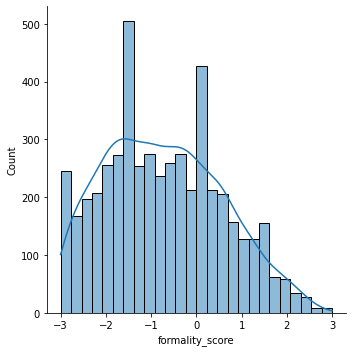

In [ ]:
sns.displot(df_answers.formality_score, kde=True)

In [ ]:
print(df_answers.shape)
print(df_blog.shape)
print(df_email.shape)
print(df_news.shape)

(4977, 4)
(1805, 4)
(1701, 4)
(2775, 4)


In [ ]:
df_answers.drop(df_answers[df_answers.formality_score==0].index, inplace=True)

In [ ]:
df_blog.drop(df_blog[df_blog.formality_score==0].index,inplace=True)

In [ ]:
df_email.formality_score = df_email.formality_score.apply(np.float)
df_news.formality_score = df_news.formality_score.apply(np.float)

In [ ]:
df_email.drop(df_email[df_email.formality_score==0].index, inplace=True)
df_news.drop(df_news[df_news.formality_score==0].index, inplace=True)

In [ ]:
df_answers.formality_score = df_answers.formality_score.apply(lambda x: 0 if x<0 else 1)
df_blog.formality_score = df_blog.formality_score.apply(lambda x: 0 if x<0 else 1)
df_email.formality_score = df_email.formality_score.apply(lambda x: 0 if x<0 else 1)
df_news.formality_score = df_news.formality_score.apply(lambda x: 0 if x<0 else 1) 

In [ ]:
answers_train, answers_test = train_test_split(df_answers, test_size=0.2, random_state=42)
blog_train, blog_test = train_test_split(df_blog, test_size=0.2, random_state=42)
email_train, email_test = train_test_split(df_email, test_size=0.2, random_state=42)
news_train, news_test = train_test_split(df_news, test_size=0.2, random_state=42)

In [ ]:
# Binary Classification
print(df_answers.shape)
print(df_blog.shape)
print(df_email.shape)
print(df_news.shape)

(4736, 4)
(1700, 4)
(1593, 4)
(2628, 4)


In [ ]:
print(answers_train.formality_score.value_counts())
print(answers_test.formality_score.value_counts())

0    2702
1    1086
Name: formality_score, dtype: int64
0    661
1    287
Name: formality_score, dtype: int64


In [ ]:
df_answers.sentence.str.len().describe()

count    4736.000000
mean       44.895904
std        19.579646
min         7.000000
25%        30.000000
50%        43.000000
75%        58.000000
max       279.000000
Name: sentence, dtype: float64

In [ ]:
df_blog.sentence.str.len().describe()

count    1700.000000
mean      126.452353
std        99.915424
min         3.000000
25%        67.000000
50%       115.000000
75%       169.000000
max      2652.000000
Name: sentence, dtype: float64

In [ ]:
df_email.sentence.str.len().describe()

count    1593.000000
mean       97.654112
std        69.349691
min         2.000000
25%        45.000000
50%        82.000000
75%       131.000000
max       427.000000
Name: sentence, dtype: float64

In [ ]:
df_news.sentence.str.len().describe()

count    2628.000000
mean      137.932268
std        64.735966
min         6.000000
25%        92.000000
50%       131.000000
75%       177.000000
max       574.000000
Name: sentence, dtype: float64

In [ ]:
ktrain.text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


In [ ]:
ktrain.text.print_text_regression_models()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
linreg: linear text regression using a trainable Embedding layer
bigru: Bidirectional GRU with pretrained English word vectors [https://arxiv.org/abs/1712.09405]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) - keras_bert implementation [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


#BERT Base - Answers Regressor

In [ ]:
model_name = 'bert-base-uncased'
t = text.Transformer(model_name, 320)

In [ ]:
train_labels = answers_train.formality_score.values
test_labels = answers_test.formality_score.values 

In [ ]:
trn = t.preprocess_train(answers_train.sentence.values, train_labels)
val = t.preprocess_test(answers_test.sentence.values, test_labels)

preprocessing train...
language: en
train sequence lengths:
	mean : 10
	95percentile : 15
	99percentile : 16


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:591: UserWarning: Task is being treated as REGRESSION because either class_names argument was not supplied or is_regression=True. If this is incorrect, change accordingly.
  'either class_names argument was not supplied or is_regression=True. ' + \


preprocessing test...
language: en
test sequence lengths:
	mean : 10
	95percentile : 15
	99percentile : 16


In [ ]:
model = t.get_regression_model(model_name)

In [ ]:
learner = ktrain.get_learner(model, trn, val, batch_size=14)

In [ ]:
print(trn.xshape())
print(val.xshape())

(3981, 320)
(996, 148)


In [ ]:
learner

In [ ]:
#learner.lr_find(show_plot=True, max_epochs=2)
# For finding optimal learning rate

In [ ]:
#From plot optimal learning rate is 8e-3

In [ ]:
# Sequence length - 320
start = timeit.default_timer()

learner.autofit(lr = 8e-3, epochs = 8, cycle_momentum=True, early_stopping=3)

stop = timeit.default_timer()
print('Time: ', stop - start) 



begin training using triangular learning rate policy with max lr of 0.008...
Epoch 1/8
285/285 [==============================] - 523s 2s/step - loss: 2.1343 - mae: 1.1972 - val_loss: 1.7577 - val_mae: 1.1119
Epoch 2/8
285/285 [==============================] - 504s 2s/step - loss: 1.9508 - mae: 1.1521 - val_loss: 1.7616 - val_mae: 1.1082
Epoch 3/8
285/285 [==============================] - 505s 2s/step - loss: 2.0042 - mae: 1.1553 - val_loss: 1.7681 - val_mae: 1.1184
Epoch 4/8
285/285 [==============================] - 510s 2s/step - loss: 2.0899 - mae: 1.1864 - val_loss: 1.7747 - val_mae: 1.1207
Restoring model weights from the end of the best epoch.
Epoch 00004: early stopping
Weights from best epoch have been loaded into model.
Time:  2043.3159066859998


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [ ]:
pred = predictor.predict(answers_test.sentence.values)

In [ ]:
pred

array([-0.7370374 , -0.73703736, -0.7370373 , -0.7370373 , -0.7370374 ,
       -0.7370374 , -0.7370374 , -0.7370373 , -0.73703736, -0.7370373 ,
       -0.7370373 , -0.7370374 , -0.7370374 , -0.7370374 , -0.7370373 ,
       -0.7370374 , -0.7370374 , -0.7370374 , -0.7370374 , -0.73703736,
       -0.7370373 , -0.7370373 , -0.7370374 , -0.7370374 , -0.73703736,
       -0.7370373 , -0.73703736, -0.7370374 , -0.73703736, -0.7370373 ,
       -0.7370373 , -0.7370373 , -0.73703736, -0.73703736, -0.73703736,
       -0.7370374 , -0.7370375 , -0.7370374 , -0.73703736, -0.7370373 ,
       -0.7370373 , -0.73703736, -0.73703736, -0.73703736, -0.7370374 ,
       -0.7370374 , -0.7370374 , -0.73703736, -0.7370374 , -0.7370374 ,
       -0.7370374 , -0.7370373 , -0.7370374 , -0.73703736, -0.7370373 ,
       -0.7370374 , -0.73703736, -0.7370373 , -0.7370373 , -0.7370374 ,
       -0.7370374 , -0.7370374 , -0.7370373 , -0.7370374 , -0.7370373 ,
       -0.7370374 , -0.7370373 , -0.7370374 , -0.7370374 , -0.73

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [ ]:
accuracy_score(test_labels, pred)

NameError: ignored

In [ ]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       661
           1       0.79      0.61      0.69       287

    accuracy                           0.83       948
   macro avg       0.82      0.77      0.79       948
weighted avg       0.83      0.83      0.83       948



In [ ]:
confusion_matrix(test_labels, pred)

array([[614,  47],
       [112, 175]])

#BERT Base - Answers Classifier


In [ ]:
model_name = 'bert-base-uncased'
t = text.Transformer(model_name, 320, class_names=np.array([0,1]))

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
train_labels = answers_train.formality_score.values
test_labels = answers_test.formality_score.values 

In [ ]:
trn = t.preprocess_train(answers_train.sentence.values, train_labels)
val = t.preprocess_test(answers_test.sentence.values, test_labels)

preprocessing train...
language: en
train sequence lengths:
	mean : 10
	95percentile : 15
	99percentile : 16


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 10
	95percentile : 15
	99percentile : 17


In [ ]:
model = t.get_classifier(model_name)

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

In [ ]:
learner = ktrain.get_learner(model, trn, val, batch_size=14)

In [ ]:
print(trn.xshape())
print(val.xshape())

(3788, 320)
(948, 118)


In [ ]:
learner

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
270/270 [==============================] - 509s 2s/step - loss: 0.7109 - accuracy: 0.4847
Epoch 2/5
270/270 [==============================] - 490s 2s/step - loss: 0.4544 - accuracy: 0.8031
Epoch 3/5
270/270 [==============================] - 490s 2s/step - loss: 0.6336 - accuracy: 0.6781
Epoch 4/5
270/270 [==============================] - 281s 1s/step - loss: 2.8396 - accuracy: 0.6100


done.
Visually inspect loss plot and select learning rate associated with falling loss


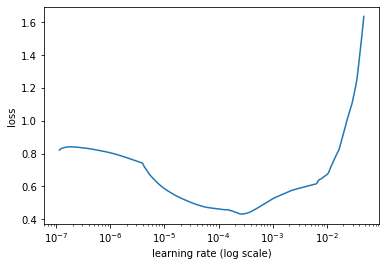

In [ ]:
learner.lr_find(show_plot=True, max_epochs=5)
# For finding optimal learning rate

In [ ]:
#From plot optimal learning rate is 2e-4

In [ ]:
# Sequence length - 320
start = timeit.default_timer()

learner.autofit(lr = 2e-4, epochs = 8, cycle_momentum=True, early_stopping=3)

stop = timeit.default_timer()
print('Time: ', stop - start) 



begin training using triangular learning rate policy with max lr of 0.0002...
Epoch 1/8
271/271 [==============================] - 523s 2s/step - loss: 0.4916 - accuracy: 0.7685 - val_loss: 0.3935 - val_accuracy: 0.8323
Epoch 2/8
271/271 [==============================] - 507s 2s/step - loss: 0.4309 - accuracy: 0.8036 - val_loss: 0.5541 - val_accuracy: 0.6973
Epoch 3/8
271/271 [==============================] - 507s 2s/step - loss: 0.4449 - accuracy: 0.8094 - val_loss: 0.5745 - val_accuracy: 0.7542
Epoch 4/8
271/271 [==============================] - 507s 2s/step - loss: 0.5876 - accuracy: 0.7352 - val_loss: 0.6266 - val_accuracy: 0.6973
Restoring model weights from the end of the best epoch.
Epoch 00004: early stopping
Weights from best epoch have been loaded into model.
Time:  2045.596662161


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [ ]:
predictor.save('/content/drive/MyDrive/bert_answers')

In [ ]:
predictor = ktrain.load_predictor('/content/drive/MyDrive/bert_answers')

In [ ]:
pred = predictor.predict(answers_test.sentence.values)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [ ]:
accuracy_score(answers_test.formality_score.values, pred)

0.8322784810126582

In [ ]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       661
           1       0.79      0.61      0.69       287

    accuracy                           0.83       948
   macro avg       0.82      0.77      0.79       948
weighted avg       0.83      0.83      0.83       948



In [ ]:
confusion_matrix(test_labels, pred)

array([[614,  47],
       [112, 175]])

#BERT Base - Blog Classifier


In [ ]:
model_name = 'bert-base-uncased'
t = text.Transformer(model_name, 320, class_names=np.array([0,1]))

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
train_labels = blog_train.formality_score.values
test_labels = blog_test.formality_score.values 

In [ ]:
trn = t.preprocess_train(blog_train.sentence.values, train_labels)
val = t.preprocess_test(blog_test.sentence.values, test_labels)

preprocessing train...
language: en
train sequence lengths:
	mean : 21
	95percentile : 43
	99percentile : 60


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 22
	95percentile : 45
	99percentile : 71


In [ ]:
model = t.get_classifier(model_name)

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

In [ ]:
learner = ktrain.get_learner(model, trn, val, batch_size=14)

In [ ]:
print(trn.xshape())
print(val.xshape())

(1360, 320)
(340, 168)


In [ ]:
learner

simulating training for different learning rates... this may take a few moments...
Epoch 1/3
97/97 [==============================] - 179s 2s/step - loss: 0.6685 - accuracy: 0.6134
Epoch 2/3
97/97 [==============================] - 165s 2s/step - loss: 0.7439 - accuracy: 0.6122
Epoch 3/3
97/97 [==============================] - 32s 311ms/step - loss: 7.9306 - accuracy: 0.4843


done.
Visually inspect loss plot and select learning rate associated with falling loss


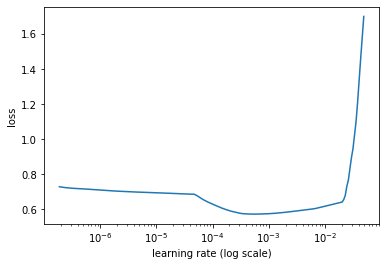

In [ ]:
learner.lr_find(show_plot=True, max_epochs=3)
# For finding optimal learning rate

In [ ]:
#From plot optimal learning rate is 3e-4

In [ ]:
# Sequence length - 320
start = timeit.default_timer()

learner.autofit(lr = 3e-4, epochs = 8, cycle_momentum=True, early_stopping=3)

stop = timeit.default_timer()
print('Time: ', stop - start) 



begin training using triangular learning rate policy with max lr of 0.0003...
Epoch 1/8
98/98 [==============================] - 203s 2s/step - loss: 0.5545 - accuracy: 0.7434 - val_loss: 0.4709 - val_accuracy: 0.8088
Epoch 2/8
98/98 [==============================] - 184s 2s/step - loss: 0.4169 - accuracy: 0.8272 - val_loss: 0.4677 - val_accuracy: 0.7912
Epoch 3/8
98/98 [==============================] - 183s 2s/step - loss: 0.5139 - accuracy: 0.7279 - val_loss: 0.6571 - val_accuracy: 0.6324
Epoch 4/8
98/98 [==============================] - 183s 2s/step - loss: 0.7101 - accuracy: 0.5618 - val_loss: 0.6596 - val_accuracy: 0.6324
Epoch 5/8
98/98 [==============================] - 182s 2s/step - loss: 0.6803 - accuracy: 0.6007 - val_loss: 0.6606 - val_accuracy: 0.6324
Restoring model weights from the end of the best epoch.
Epoch 00005: early stopping
Weights from best epoch have been loaded into model.
Time:  936.856021231


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [ ]:
predictor.save('/content/drive/MyDrive/bert_blog')

In [ ]:
predictor = ktrain.load_predictor('/content/drive/MyDrive/bert_blog')

In [ ]:
pred = predictor.predict(blog_test.sentence.values)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [ ]:
accuracy_score(blog_test.formality_score.values, pred)

0.7911764705882353

In [ ]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       125
           1       0.83      0.84      0.84       215

    accuracy                           0.79       340
   macro avg       0.78      0.77      0.77       340
weighted avg       0.79      0.79      0.79       340



In [ ]:
confusion_matrix(test_labels, pred)

array([[ 88,  37],
       [ 34, 181]])

#BERT Base - Email Classifier


In [ ]:
model_name = 'bert-base-uncased'
t = text.Transformer(model_name, 320, class_names=np.array([0,1]))

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
train_labels = email_train.formality_score.values
test_labels = email_test.formality_score.values 

In [ ]:
trn = t.preprocess_train(email_train.sentence.values, train_labels)
val = t.preprocess_test(email_test.sentence.values, test_labels)

preprocessing train...
language: en
train sequence lengths:
	mean : 18
	95percentile : 43
	99percentile : 57


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 19
	95percentile : 43
	99percentile : 54


In [ ]:
model = t.get_classifier(model_name)

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

In [ ]:
learner = ktrain.get_learner(model, trn, val, batch_size=14)

In [ ]:
print(trn.xshape())
print(val.xshape())

(1274, 320)
(319, 79)


In [ ]:
learner

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
91/91 [==============================] - 169s 2s/step - loss: 0.7710 - accuracy: 0.4411
Epoch 2/5
91/91 [==============================] - 156s 2s/step - loss: 0.5023 - accuracy: 0.7590
Epoch 3/5
91/91 [==============================] - 156s 2s/step - loss: 0.7189 - accuracy: 0.6122
Epoch 4/5
91/91 [==============================] - 138s 2s/step - loss: 5.2424 - accuracy: 0.5450


done.
Visually inspect loss plot and select learning rate associated with falling loss


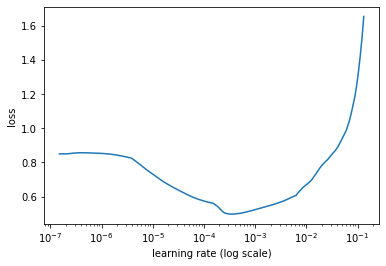

In [ ]:
learner.lr_find(show_plot=True, max_epochs=5)
# For finding optimal learning rate

In [ ]:
#From plot optimal learning rate is 2e-4 

In [ ]:
# Sequence length - 320
start = timeit.default_timer()

learner.autofit(lr = 2e-4, epochs = 8, cycle_momentum=True, early_stopping=3)

stop = timeit.default_timer()
print('Time: ', stop - start) 



begin training using triangular learning rate policy with max lr of 0.0002...
Epoch 1/8
91/91 [==============================] - 176s 2s/step - loss: 0.5257 - accuracy: 0.7567 - val_loss: 0.4229 - val_accuracy: 0.8401
Epoch 2/8
91/91 [==============================] - 158s 2s/step - loss: 0.4193 - accuracy: 0.8462 - val_loss: 0.4847 - val_accuracy: 0.8056
Epoch 3/8
91/91 [==============================] - 158s 2s/step - loss: 0.3683 - accuracy: 0.8611 - val_loss: 0.5491 - val_accuracy: 0.7994
Epoch 4/8
91/91 [==============================] - 158s 2s/step - loss: 0.4365 - accuracy: 0.8155 - val_loss: 0.7219 - val_accuracy: 0.6740
Restoring model weights from the end of the best epoch.
Epoch 00004: early stopping
Weights from best epoch have been loaded into model.
Time:  651.6205537599999


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [ ]:
predictor.save('/content/drive/MyDrive/bert_email')

In [ ]:
predictor = ktrain.load_predictor('/content/drive/MyDrive/bert_email')

In [ ]:
pred = predictor.predict(email_test.sentence.values)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [ ]:
accuracy_score(email_test.formality_score.values, pred)

0.8401253918495298

In [ ]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       104
           1       0.87      0.90      0.88       215

    accuracy                           0.84       319
   macro avg       0.82      0.81      0.81       319
weighted avg       0.84      0.84      0.84       319



In [ ]:
confusion_matrix(test_labels, pred)

array([[ 74,  30],
       [ 21, 194]])

#BERT Base - News Classifier

In [ ]:
model_name = 'bert-base-uncased'
t = text.Transformer(model_name, 320, class_names=np.array([0,1]))

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
train_labels = news_train.formality_score.values
test_labels = news_test.formality_score.values 

In [ ]:
trn = t.preprocess_train(news_train.sentence.values, train_labels)
val = t.preprocess_test(news_test.sentence.values, test_labels)

preprocessing train...
language: en
train sequence lengths:
	mean : 23
	95percentile : 41
	99percentile : 53


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 23
	95percentile : 43
	99percentile : 59


In [ ]:
model = t.get_classifier(model_name)

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

In [ ]:
learner = ktrain.get_learner(model, trn, val, batch_size=14)

In [ ]:
print(trn.xshape())
print(val.xshape())

(2102, 320)
(526, 139)


In [ ]:
learner

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
150/150 [==============================] - 274s 2s/step - loss: 0.5148 - accuracy: 0.8157
Epoch 2/5
150/150 [==============================] - 256s 2s/step - loss: 0.4127 - accuracy: 0.8309
Epoch 3/5
150/150 [==============================] - 256s 2s/step - loss: 0.4884 - accuracy: 0.8113
Epoch 4/5
150/150 [==============================] - 180s 1s/step - loss: 2.7027 - accuracy: 0.6868


done.
Visually inspect loss plot and select learning rate associated with falling loss


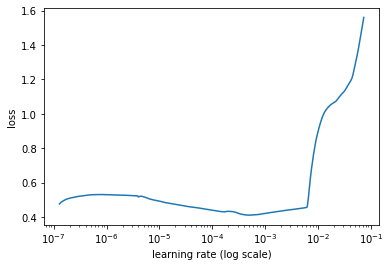

In [ ]:
learner.lr_find(show_plot=True, max_epochs=5)
# For finding optimal learning rate

In [ ]:
#From plot optimal learning rate is 2e-4 

In [ ]:
# Sequence length - 320
start = timeit.default_timer()

learner.autofit(lr = 2e-4, epochs = 8, cycle_momentum=True, early_stopping=3)

stop = timeit.default_timer()
print('Time: ', stop - start) 



begin training using triangular learning rate policy with max lr of 0.0002...
Epoch 1/8
151/151 [==============================] - 282s 2s/step - loss: 0.4234 - accuracy: 0.8359 - val_loss: 0.3597 - val_accuracy: 0.8536
Epoch 2/8
151/151 [==============================] - 267s 2s/step - loss: 0.3695 - accuracy: 0.8573 - val_loss: 0.3706 - val_accuracy: 0.8650
Epoch 3/8
151/151 [==============================] - 266s 2s/step - loss: 0.2978 - accuracy: 0.8996 - val_loss: 0.3664 - val_accuracy: 0.8536
Epoch 4/8
151/151 [==============================] - 266s 2s/step - loss: 0.2367 - accuracy: 0.9310 - val_loss: 0.4500 - val_accuracy: 0.8441
Restoring model weights from the end of the best epoch.
Epoch 00004: early stopping
Weights from best epoch have been loaded into model.
Time:  1081.7743521060002


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [ ]:
predictor.save('/content/drive/MyDrive/bert_news')

In [ ]:
predictor = ktrain.load_predictor('/content/drive/MyDrive/bert_news')

In [ ]:
pred = predictor.predict(news_test.sentence.values)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [ ]:
accuracy_score(news_test.formality_score.values, pred)

0.8536121673003803

In [ ]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.62      0.38      0.48        91
           1       0.88      0.95      0.91       435

    accuracy                           0.85       526
   macro avg       0.75      0.67      0.70       526
weighted avg       0.84      0.85      0.84       526



In [ ]:
confusion_matrix(test_labels, pred)

array([[ 35,  56],
       [ 21, 414]])

#BERT Base - GYAFC E&M and F&R Combined Classifier

In [ ]:
model_name = 'bert-base-uncased'
t = text.Transformer(model_name, 128, class_names=np.array([0,1]))

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
train_labels = fr_train.formality_score.values
test_labels = fr_test.formality_score.values 

In [ ]:
fr_train.formality_score.value_counts()

1.0    104562
0.0    104562
Name: formality_score, dtype: int64

In [ ]:
trn = t.preprocess_train(fr_train.sentence.values, train_labels)
val = t.preprocess_test(fr_test.sentence.values, test_labels)

preprocessing train...
language: en
train sequence lengths:
	mean : 11
	95percentile : 18
	99percentile : 21


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:632: UserWarning: class_names implies classification but targets array contains float(s) instead of integers or strings
  warnings.warn('class_names implies classification but targets array contains float(s) instead of integers or strings')


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 11
	95percentile : 18
	99percentile : 20


In [ ]:
model = t.get_classifier(model_name)

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

In [ ]:
learner = ktrain.get_learner(model, trn, val, batch_size=32)

In [ ]:
print(trn.xshape())
print(val.xshape())

(209124, 128)
(4849, 50)


In [ ]:
learner

simulating training for different learning rates... this may take a few moments...
6535/6535 [==============================] - 7813s 1s/step - loss: 1.9218 - accuracy: 0.6477


done.
Visually inspect loss plot and select learning rate associated with falling loss


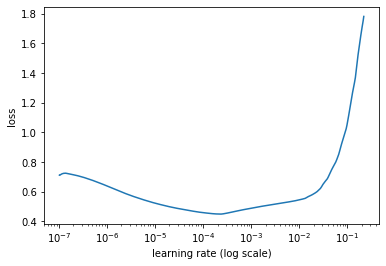

In [ ]:
learner.lr_find(show_plot=True, max_epochs=1)
# For finding optimal learning rate - 100% data 

In [ ]:
# Sequence length - 128 - 100% data
# Btach Size - 32
start = timeit.default_timer()

learner.autofit(lr = 1e-4, epochs = 1)

stop = timeit.default_timer()
print('Time: ', stop - start) 



begin training using triangular learning rate policy with max lr of 0.0001...
6536/6536 [==============================] - 9793s 1s/step - loss: 0.3125 - accuracy: 0.8630 - val_loss: 0.2431 - val_accuracy: 0.8956
Time:  9793.565315872


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [ ]:
predictor.save('/content/drive/MyDrive/bert_gyafc_fr_em')

In [ ]:
predictor = ktrain.load_predictor('/content/drive/MyDrive/bert_gyafc_fr_em')

In [ ]:
# Trained on EM+FR, tested on Formality corpus
print(accuracy_score(df_answers.formality_score.values, predictor.predict(df_answers.sentence.values)))
print(accuracy_score(df_blog.formality_score.values, predictor.predict(df_blog.sentence.values)))
print(accuracy_score(df_email.formality_score.values, predictor.predict(df_email.sentence.values)))
print(accuracy_score(df_news.formality_score.values, predictor.predict(df_news.sentence.values)))

0.6551942567567568
0.7005882352941176
0.7112366603892027
0.8207762557077626


In [ ]:
pred_bert = predictor.predict_proba(fr_test.sentence.values)

In [ ]:
pred = predictor.predict(fr_test.sentence.values) 

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [ ]:
accuracy_score(fr_test.formality_score.values, pred) 

0.8956485873375953

In [ ]:
print(classification_report(fr_test.formality_score.values, pred))

              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90      2748
         1.0       0.83      0.96      0.89      2101

    accuracy                           0.90      4849
   macro avg       0.90      0.90      0.90      4849
weighted avg       0.90      0.90      0.90      4849



In [ ]:
confusion_matrix(fr_test.formality_score.values, pred)

array([[2335,  413],
       [  93, 2008]])

#RoBERTa Base - GYAFC E&M and F&R Combined Classifier

In [ ]:
model_name = 'roberta-base'
t = text.Transformer(model_name, 128, class_names=np.array([0,1]))

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
train_labels = fr_train.formality_score.values
test_labels = fr_test.formality_score.values 

In [ ]:
fr_train.formality_score.value_counts()

1.0    104562
0.0    104562
Name: formality_score, dtype: int64

In [ ]:
trn = t.preprocess_train(fr_train.sentence.values, train_labels)
val = t.preprocess_test(fr_test.sentence.values, test_labels)

preprocessing train...
language: en
train sequence lengths:
	mean : 11
	95percentile : 18
	99percentile : 21


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:632: UserWarning: class_names implies classification but targets array contains float(s) instead of integers or strings
  warnings.warn('class_names implies classification but targets array contains float(s) instead of integers or strings')


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 11
	95percentile : 18
	99percentile : 20


In [ ]:
model = t.get_classifier(model_name)

Downloading:   0%|          | 0.00/657M [00:00<?, ?B/s]

In [ ]:
learner = ktrain.get_learner(model, trn, val, batch_size=32)

In [ ]:
print(trn.xshape())
print(val.xshape())

(209124, 128)
(4849, 51)


In [ ]:
learner

simulating training for different learning rates... this may take a few moments...
6535/6535 [==============================] - 7547s 1s/step - loss: 1.6686 - accuracy: 0.6827


done.
Visually inspect loss plot and select learning rate associated with falling loss


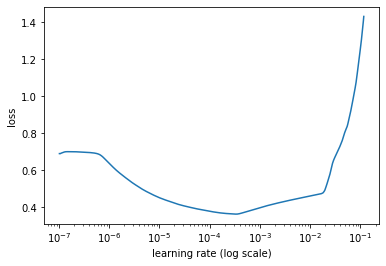

In [ ]:
learner.lr_find(show_plot=True, max_epochs=1)
# For finding optimal learning rate - 100% data 

In [ ]:
# Sequence length - 128 - 100% data 
# Batch Size - 32
start = timeit.default_timer()

learner.autofit(lr = 1e-4, epochs = 1)

stop = timeit.default_timer()
print('Time: ', stop - start) 



begin training using triangular learning rate policy with max lr of 0.0001...
6536/6536 [==============================] - 9608s 1s/step - loss: 0.2151 - accuracy: 0.9114 - val_loss: 0.1500 - val_accuracy: 0.9398
Time:  9644.285231874


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [ ]:
predictor.save('/content/drive/MyDrive/roberta_gyafc_fr_em') 

In [ ]:
predictor = ktrain.load_predictor('/content/drive/MyDrive/roberta_gyafc_fr_em') 

In [ ]:
# Trained on EM+FR, tested on Formality corpus
print(accuracy_score(df_answers.formality_score.values, predictor.predict(df_answers.sentence.values)))
print(accuracy_score(df_blog.formality_score.values, predictor.predict(df_blog.sentence.values)))
print(accuracy_score(df_email.formality_score.values, predictor.predict(df_email.sentence.values)))
print(accuracy_score(df_news.formality_score.values, predictor.predict(df_news.sentence.values)))

0.8086993243243243
0.6623529411764706
0.7796610169491526
0.8230593607305936


In [ ]:
pred_roberta = predictor.predict_proba(fr_test.sentence.values)

In [ ]:
pred = predictor.predict(fr_test.sentence.values)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [ ]:
accuracy_score(fr_tune.formality_score.values, predictor.predict(fr_tune.sentence.values)) 

0.9438059992208804

In [ ]:
accuracy_score(fr_test.formality_score.values, pred) 

0.9397813982264385

In [ ]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      2748
         1.0       0.90      0.97      0.93      2101

    accuracy                           0.94      4849
   macro avg       0.94      0.94      0.94      4849
weighted avg       0.94      0.94      0.94      4849



In [ ]:
confusion_matrix(test_labels, pred)

array([[2517,  231],
       [  61, 2040]])

#ELECTRA Base - GYAFC E&M and F&R Combined Classifier

In [ ]:
model_name = 'google/electra-base-discriminator'
t = text.Transformer(model_name, 128, class_names=np.array([0,1]))

Downloading:   0%|          | 0.00/666 [00:00<?, ?B/s]

In [ ]:
train_labels = fr_train.formality_score.values
test_labels = fr_test.formality_score.values 

In [ ]:
fr_train.formality_score.value_counts()

1.0    104562
0.0    104562
Name: formality_score, dtype: int64

In [ ]:
trn = t.preprocess_train(fr_train.sentence.values, train_labels)
val = t.preprocess_test(fr_test.sentence.values, test_labels)

preprocessing train...
language: en
train sequence lengths:
	mean : 11
	95percentile : 18
	99percentile : 21


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:632: UserWarning: class_names implies classification but targets array contains float(s) instead of integers or strings
  warnings.warn('class_names implies classification but targets array contains float(s) instead of integers or strings')


Downloading:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 11
	95percentile : 18
	99percentile : 20


In [ ]:
model = t.get_classifier(model_name)

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [ ]:
learner = ktrain.get_learner(model, trn, val, batch_size=32)

In [ ]:
print(trn.xshape())
print(val.xshape())

(209124, 128)
(4849, 50)


In [ ]:
learner

In [ ]:
learner.lr_find(show_plot=True, max_epochs=1) 
# For finding optimal learning rate - 100% data 

In [ ]:
# Sequence length - 128 - 100% data 
# Batch Size - 32
start = timeit.default_timer()

learner.autofit(lr = 4e-5, epochs = 1)

stop = timeit.default_timer()
print('Time: ', stop - start) 



begin training using triangular learning rate policy with max lr of 4e-05...
6536/6536 [==============================] - 9882s 1s/step - loss: 0.3021 - accuracy: 0.8683 - val_loss: 0.2383 - val_accuracy: 0.8973
Time:  9882.010303347999


In [ ]:
# Sequence length - 128 - 100% data 
# Batch Size - 32
start = timeit.default_timer()

learner.autofit(lr = 5e-5, epochs = 1)

stop = timeit.default_timer()
print('Time: ', stop - start) 



begin training using triangular learning rate policy with max lr of 5e-05...
6536/6536 [==============================] - 9812s 1s/step - loss: 0.3022 - accuracy: 0.8686 - val_loss: 0.2328 - val_accuracy: 0.9000
Time:  9823.909508524


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [ ]:
predictor.save('/content/drive/MyDrive/electra_gyafc_fr_em') 

In [ ]:
predictor = ktrain.load_predictor('/content/drive/MyDrive/electra_gyafc_fr_em') 

In [ ]:
pred_electra = predictor.predict_proba(fr_test.sentence.values) 

In [ ]:
pred = predictor.predict(fr_test.sentence.values)

Downloading:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/666 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [ ]:
accuracy_score(fr_tune.formality_score.values, predictor.predict(fr_tune.sentence.values)) 

0.9030970003895598

In [ ]:
accuracy_score(fr_test.formality_score.values, pred) 

0.8999793771911735

In [ ]:
print(classification_report(fr_test.formality_score.values, pred))

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91      2748
         1.0       0.84      0.96      0.89      2101

    accuracy                           0.90      4849
   macro avg       0.90      0.91      0.90      4849
weighted avg       0.91      0.90      0.90      4849



In [ ]:
confusion_matrix(fr_test.formality_score.values, pred)

array([[2354,  394],
       [  91, 2010]])

#DeBERTa Base - GYAFC E&M and F&R Combined Classifier

In [ ]:
model_name = 'kamalkraj/deberta-base'
t = text.Transformer(model_name, 128, class_names=np.array([0,1]))

In [ ]:
train_labels = fr_train.formality_score.values
test_labels = fr_test.formality_score.values 

In [ ]:
fr_train.formality_score.value_counts()

1.0    104562
0.0    104562
Name: formality_score, dtype: int64

In [ ]:
trn = t.preprocess_train(fr_train.sentence.values, train_labels)
val = t.preprocess_test(fr_test.sentence.values, test_labels)

preprocessing train...
language: en
train sequence lengths:
	mean : 11
	95percentile : 18
	99percentile : 21


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:632: UserWarning: class_names implies classification but targets array contains float(s) instead of integers or strings
  warnings.warn('class_names implies classification but targets array contains float(s) instead of integers or strings')


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 11
	95percentile : 18
	99percentile : 20


In [ ]:
model = t.get_classifier(model_name)

Downloading:   0%|          | 0.00/555M [00:00<?, ?B/s]

In [ ]:
learner = ktrain.get_learner(model, trn, val, batch_size=32)

In [ ]:
print(trn.xshape())
print(val.xshape())

(209124, 128)
(4849, 51)


In [ ]:
learner

simulating training for different learning rates... this may take a few moments...
6535/6535 [==============================] - 11327s 2s/step - loss: 426.0880 - accuracy: 0.6616


done.
Visually inspect loss plot and select learning rate associated with falling loss


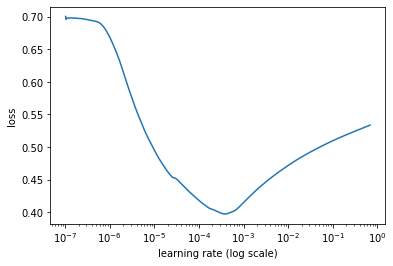

In [ ]:
learner.lr_find(show_plot=True, max_epochs=1) 
# For finding optimal learning rate - 100% data 

In [ ]:
# Sequence length - 128 - 100% data 
# Batch Size - 32
start = timeit.default_timer()

learner.autofit(lr = 1e-4, epochs = 1)

stop = timeit.default_timer()
print('Time: ', stop - start) 



begin training using triangular learning rate policy with max lr of 0.0001...
6536/6536 [==============================] - 13488s 2s/step - loss: 0.2124 - accuracy: 0.9110 - val_loss: 0.1755 - val_accuracy: 0.9293
Time:  13488.035140745


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [ ]:
predictor.save('/content/drive/MyDrive/deberta_gyafc_fr_em') 

In [ ]:
predictor = ktrain.load_predictor('/content/drive/MyDrive/deberta_gyafc_fr_em') 

In [ ]:
pred_deberta = predictor.predict_proba(fr_test.sentence.values) 

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/744 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [ ]:
pred = predictor.predict(fr_test.sentence.values)

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/744 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [ ]:
accuracy_score(fr_tune.formality_score.values, predictor.predict(fr_tune.sentence.values)) 

0.9364043630697312

In [ ]:
accuracy_score(fr_test.formality_score.values, pred) 

0.9292637657248918

In [ ]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      2748
         1.0       0.87      0.98      0.92      2101

    accuracy                           0.93      4849
   macro avg       0.93      0.94      0.93      4849
weighted avg       0.94      0.93      0.93      4849



In [ ]:
confusion_matrix(test_labels, pred)

array([[2447,  301],
       [  42, 2059]])

#XLNet Base - GYAFC E&M and F&R Combined Classifier

In [ ]:
model_name = 'xlnet-base-cased'
t = text.Transformer(model_name, 128, class_names=np.array([0,1]))

Downloading:   0%|          | 0.00/760 [00:00<?, ?B/s]

In [ ]:
train_labels = fr_train.formality_score.values
test_labels = fr_test.formality_score.values 

In [ ]:
fr_train.formality_score.value_counts()

1.0    104562
0.0    104562
Name: formality_score, dtype: int64

In [ ]:
trn = t.preprocess_train(fr_train.sentence.values, train_labels)
val = t.preprocess_test(fr_test.sentence.values, test_labels)

preprocessing train...
language: en
train sequence lengths:
	mean : 11
	95percentile : 18
	99percentile : 21


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:632: UserWarning: class_names implies classification but targets array contains float(s) instead of integers or strings
  warnings.warn('class_names implies classification but targets array contains float(s) instead of integers or strings')


Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 11
	95percentile : 18
	99percentile : 20


In [ ]:
model = t.get_classifier(model_name)

Downloading:   0%|          | 0.00/565M [00:00<?, ?B/s]

In [ ]:
learner = ktrain.get_learner(model, trn, val, batch_size=32)

In [ ]:
print(trn.xshape())
print(val.xshape())

(209124, 128)
(4849, 60)


In [ ]:
learner

simulating training for different learning rates... this may take a few moments...
6535/6535 [==============================] - 10323s 2s/step - loss: 1.7889 - accuracy: 0.6629


done.
Visually inspect loss plot and select learning rate associated with falling loss


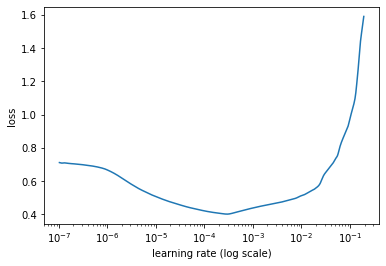

In [ ]:
learner.lr_find(show_plot=True, max_epochs=1) 
# For finding optimal learning rate - 100% data 

In [ ]:
# Sequence length - 128 - 100% data 
# Batch Size - 32
start = timeit.default_timer()

learner.autofit(lr = 1e-4, epochs = 1)

stop = timeit.default_timer()
print('Time: ', stop - start) 



begin training using triangular learning rate policy with max lr of 0.0001...
  61/6536 [..............................] - ETA: 3:48:43 - loss: 0.5859 - accuracy: 0.6885

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [ ]:
predictor.save('/content/drive/MyDrive/deberta_gyafc_fr_em') 

In [ ]:
predictor = ktrain.load_predictor('/content/drive/MyDrive/deberta_gyafc_fr_em') 

In [ ]:
pred = predictor.predict(fr_test.sentence.values)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [ ]:
accuracy_score(fr_tune.formality_score.values, predictor.predict(fr_tune.sentence.values)) 

0.9364043630697312

In [ ]:
accuracy_score(fr_test.formality_score.values, pred) 

0.9292637657248918

In [ ]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      2748
         1.0       0.87      0.98      0.92      2101

    accuracy                           0.93      4849
   macro avg       0.93      0.94      0.93      4849
weighted avg       0.94      0.93      0.93      4849



In [ ]:
confusion_matrix(test_labels, pred)

array([[2447,  301],
       [  42, 2059]])

#Ensemble Models

# New Section

In [ ]:
# All available models : Accuracy on GYAFC F&R + E&M
# BERT    - 89.56
# RoBERTa - 93.98
# ELECTRA - 89.73
# DeBERTa - 92.93
# XLNet   - 93.30 (Model is giving OOM - Out Of Memory error on Colab free version)

In [ ]:
# Combinations
# RoBERTa + DeBERTa                -  0.9354506083728604
# RoBERTa + ELECTRA                -  0.9469993813157352 2nd
# ELECTRA + DeBERTa                -  0.9371004330789854 
# BERT + RoBERTa                   -  0.9472056094040008 1st
# BERT + DeBERTa                   -  0.9358630645493916
# BERT + ELECTRA                   -  0.8991544648381109
# BERT + RoBERTa + ELECTRA         -  0.928026397195298
# RoBERTa + ELECTRA + DeBERTa      -  0.9424623633738916 4th
# BERT + ELECTRA + DeBERTa         -  0.9224582388121262
# BERT + RoBERTa + DeBERTa         -  0.9420499071973603  5th
# BERT + RoBERTa + ELECTRA + DeBERTa -  0.9426685914621571 3rd 

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix 

In [ ]:
# RoBERTa + DeBERTa 
roberta_deberta_preds = []
for a,b in zip(pred_roberta, pred_deberta):
  c = (a+b)/2
  if c[0]>=c[1]:
    roberta_deberta_preds.append(0)
  else:
    roberta_deberta_preds.append(1)
# RoBERTa - 93.98
# DeBERTa - 92.93
accuracy_score(fr_test.formality_score.values, roberta_deberta_preds) 

0.9354506083728604

In [ ]:
# RoBERTa + ELECTRA 
roberta_electra_preds = []
for a,b in zip(pred_roberta, pred_electra):
  c = (a+b)/2
  if c[0]>=c[1]:
    roberta_electra_preds.append(0)
  else:
    roberta_electra_preds.append(1)
# RoBERTa - 93.98
# ELECTRA - 89.73
accuracy_score(fr_test.formality_score.values, roberta_electra_preds) 

0.9490616621983914

In [ ]:
# ELECTRA + DeBERTa 
electra_deberta_preds = []
for a,b in zip(pred_electra, pred_deberta):
  c = (a+b)/2
  if c[0]>=c[1]:
    electra_deberta_preds.append(0)
  else:
    electra_deberta_preds.append(1)
# ELECTRA - 89.73
# DeBERTa - 92.93
accuracy_score(fr_test.formality_score.values, electra_deberta_preds) 

0.9391627139616415

In [ ]:
# BERT + RoBERTa
bert_roberta_preds = []
for a,b in zip(pred_bert, pred_roberta):
  c = (a+b)/2
  if c[0]>=c[1]:
    bert_roberta_preds.append(0)
  else:
    bert_roberta_preds.append(1)
# BERT - 89.23
# RoBERTa - 93.98
accuracy_score(fr_test.formality_score.values, bert_roberta_preds) 

0.9490616621983914

In [ ]:
# BERT + DeBERTa
bert_deberta_preds = []
for a,b in zip(pred_bert, pred_deberta):
  c = (a+b)/2
  if c[0]>=c[1]:
    bert_deberta_preds.append(0)
  else:
    bert_deberta_preds.append(1)
# BERT - 89.23
# DeBERTa - 92.93 
accuracy_score(fr_test.formality_score.values, bert_deberta_preds) 

0.9381315735203135

In [ ]:
# BERT + ELECTRA
bert_electra_preds = []
for a,b in zip(pred_bert, pred_electra):
  c = (a+b)/2
  if c[0]>=c[1]:
    bert_electra_preds.append(0)
  else:
    bert_electra_preds.append(1)
# BERT - 89.23
# ELECTRA - 89.73
accuracy_score(fr_test.formality_score.values, bert_electra_preds) 

0.9049288513095484

In [ ]:
# BERT + RoBERTa + ELECTRA  
bert_roberta_electra_preds = []
for a,b,d in zip(pred_bert, pred_roberta, pred_electra):
  c = (a+b+d)/3
  if c[0]>=c[1]:
    bert_roberta_electra_preds.append(0)
  else:
    bert_roberta_electra_preds.append(1)
# BERT - 89.23
# RoBERTa - 93.98
# ELECTRA - 89.73
accuracy_score(fr_test.formality_score.values, bert_roberta_electra_preds) 

0.9276139410187667

In [ ]:
# RoBERTa + ELECTRA + DeBERTa 
roberta_electra_deberta_preds = []
for a,b,d in zip(pred_roberta, pred_electra, pred_deberta):
  c = (a+b+d)/3
  if c[0]>=c[1]:
    roberta_electra_deberta_preds.append(0)
  else:
    roberta_electra_deberta_preds.append(1)
# RoBERTa - 93.98
# ELECTRA - 89.73
# DeBERTa - 92.93
accuracy_score(fr_test.formality_score.values, roberta_electra_deberta_preds) 

0.943287275726954

In [ ]:
# BERT + ELECTRA + DeBERTa 
bert_electra_deberta_preds = []
for a,b,d in zip(pred_bert, pred_electra, pred_deberta):
  c = (a+b+d)/3
  if c[0]>=c[1]:
    bert_electra_deberta_preds.append(0)
  else:
    bert_electra_deberta_preds.append(1)
# BERT - 89.23
# ELECTRA - 89.73
# DeBERTa - 92.93
accuracy_score(fr_test.formality_score.values, bert_electra_deberta_preds) 

0.9251392039595793

In [ ]:
# BERT + RoBERTa + DeBERTa 
bert_roberta_deberta_preds = []
for a,b,d in zip(pred_bert, pred_roberta, pred_deberta):
  c = (a+b+d)/3
  if c[0]>=c[1]:
    bert_roberta_deberta_preds.append(0)
  else:
    bert_roberta_deberta_preds.append(1)
# BERT - 89.23
# RoBERTa - 93.98
# DeBERTa - 92.93
accuracy_score(fr_test.formality_score.values, bert_roberta_deberta_preds) 

0.943287275726954

In [ ]:
# BERT + RoBERTa + ELECTRA + DeBERTa 
bert_roberta_electra_deberta_preds = []
for a,b,d,e in zip(pred_bert, pred_roberta, pred_electra, pred_deberta):
  c = (a+b+d+e)/4
  if c[0]>=c[1]:
    bert_roberta_electra_deberta_preds.append(0)
  else:
    bert_roberta_electra_deberta_preds.append(1)
# BERT - 89.23
# RoBERTa - 93.98
# ELECTRA - 89.73
# DeBERTa - 92.93
accuracy_score(fr_test.formality_score.values, bert_roberta_electra_deberta_preds) 

0.944937100433079